In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [216]:
#Opening the dataset for the first time. The dataset has values that are not in the utf-8 encoding, so I decided to try latin-1 encoding and it worked.


#We can see that we have a few columns which could be very useful. Specifically quantity, unit price, and country. These can be used to make a nice dashboard


filepath = 'C:\\Users\\Omar\Desktop\\Python Stuff\\Portfolio Stuff\\data.csv'
df = pd.read_csv(filepath, encoding = "latin-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [217]:
#Lets explore this dataframe a bit more before we start working with the data. How many rows are we working with?

num_rows = len(df)

In [218]:
#Ok great, it seems like we have a lot of data to work with. I want to clean this data to make sure there are no values which could interfere with our calculations.

#I could just preform dropna on this dataset to get rid of any rows with missing values, But I want to check and make sure that the rows I am dropping are not significant in any way. For example, I do not want to drop an order of 5000 pieces just because the descriptor is missing

#Lets see all the rows with missing values

rows_with_missing = df[df.isna().any(axis = 1)]

print(rows_with_missing)

print("We have" + " " + str(len(rows_with_missing)) + " " + "rows with at least 1 NA value")

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  United Kin

In [219]:
#OK, it seems like the missing values are all in the CustomerID Column, as well as the Description Column. This is good news. If we come across a missing Description value, we can cross reference that with the StockCode number to get the description.
#As for the CustomerID, this is a little bit of a problem as we wont have the most accurate outlook on which customers purchased which products. However, I dont think this will be an issue for this project.

print(df.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [220]:
#Lets add a TotalRevenue Column. This will allow us to get a clearer look of how much revenue we earned per sale. We can also do other calculations with it.

df['TotalRevenue'] = df['UnitPrice'] * df['Quantity']

In [221]:
#How much revenue did we make from all of this data? Which individual sale made the most money? Which gave us the least amount of money?

total_rev = df['TotalRevenue'].sum()

max_rev = df['TotalRevenue'].max()

min_rev = df['TotalRevenue'].min()

print("Our total revenue was: " + str(total_rev.round()) + ", Our biggest sale was worth: " + str(max_rev.round()) + ", Our smallest sale was: " + str(min_rev.round()))

Our total revenue was: 9747748.0, Our biggest sale was worth: 168470.0, Our smallest sale was: -168470.0


In [222]:
#Thats weird, our smallest sale seems to be way in the negatives. Lets check out whats going wrong with our minimum value.
df.min()

C:\Users\Omar\AppData\Local\Temp\ipykernel_36816\873247926.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


InvoiceNo                536365
StockCode                 10002
Quantity                 -80995
InvoiceDate     1/10/2011 10:04
UnitPrice             -11062.06
CustomerID              12346.0
Country               Australia
TotalRevenue          -168469.6
dtype: object

In [223]:
#It seems that our quantity and UnitPrice are waaaay in the negatives. Multiplying a negative Number by a negative Number will also give us a positive, and mess up our calculations for other things.
#Lets fix this by getting rid of all negative quantities and UnitPrices. I dont think its possible to sell a negative amount of product, or to recieve a negative amount of money.

In [224]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [225]:
#There we go, this should make much more sense.
#4 purple flock dinner candles sold for a 10th of a cent. Might have had some coupon applied or something, so I will keep this as a valid row.
df.min()

InvoiceNo                               536365
StockCode                                10002
Description      4 PURPLE FLOCK DINNER CANDLES
Quantity                                     1
InvoiceDate                    1/10/2011 10:32
UnitPrice                                0.001
CustomerID                             12346.0
Country                              Australia
TotalRevenue                             0.001
dtype: object

In [147]:
#Now that we have our data cleaned and processed, we can put it through Looker to make a neat looking dashboard
df.to_csv('C:\\Users\\Omar\Desktop\\Python Stuff\\Portfolio Stuff\\updated_data.csv')

In [226]:
#When trying to  upload the data to looker, I got an error stating that There was no heading for the first column in the dataset.


In [227]:
#I am assuming that they mean that the issue was with the index column not having a heading, so I renamed it here.

df.rename_axis("Index", inplace=True)

There we go, our dataset is now uploading

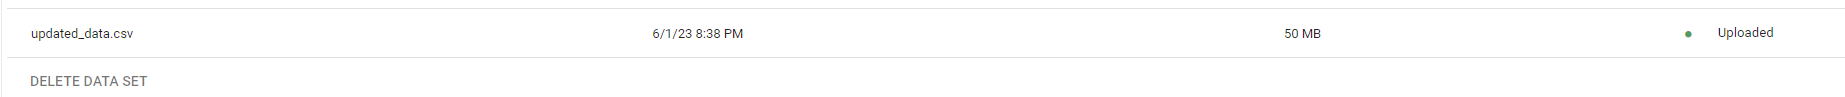

As I was importing the data into Looker, I noticed something strange.

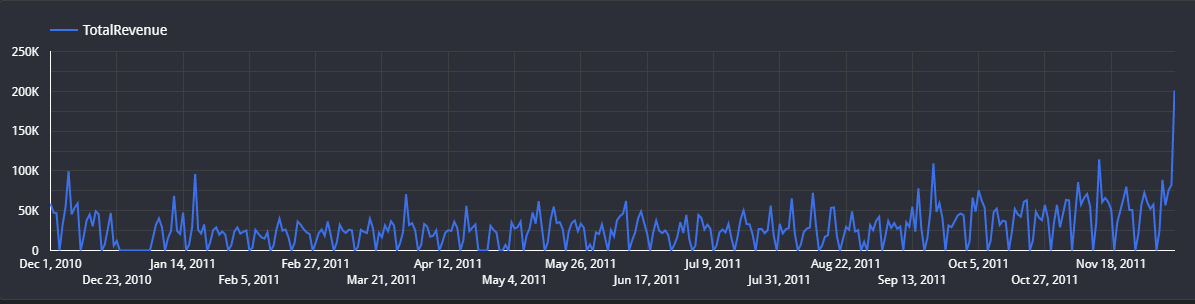

I noticed that there were a lot of 0 values for total revenue. Total Revenue is the product of the UnitPrice and the Quantity column, so the zero values must come from one or both of those columns being zero.

Lets check those values below

In [228]:
df[df['TotalRevenue'] == 0]
df[df['UnitPrice'] == 0]
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
Index,,,,,,,,,


It seems that there are no instances of Total Revenue, Unit Price, or Quantity being 0 in our dataframe. This makes it quite odd that we are seeing these values in the graph however.
Lets check if the issue stems from not having any sales on those dates.

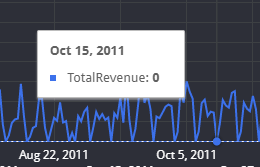

Above is a date which is correlated to a zero value. Lets see the information on this date in our dataframe to see if we can find the issue.

In [234]:
#One of the issues is that our InvoiceDate column is in a weird format. "yyyy-mm-dd hr-min-sec". This makes it hard to find the value on October 15th, 2011 because we dont specifically know what time the order was placed.
#To solve this, I will just convert the InvoiceDate column from s String object into a DateTime Object.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [235]:
#Now that it is a DateTime Object, we can call dt.date on it to get rid of the timestamps.

df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [233]:
df['InvoiceDate']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
Index,,,,,,,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60


Here we go, now we can search for the sales that happened during our date.

In [264]:
search_data = pd.Timestamp('2011-10-15')
df[df['InvoiceDate'] == search_data]

C:\Users\Omar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
Index,,,,,,,,,


This is interesting. it seems that the reason that we are getting values for 0 in the Total Revenues column because there were just no sales on those days.

After a bit of research, it seems that every day with a 0 value lands on a Saturday. Im going to attribute this to the fact that the shop is closed on saturdays, or that the online store is down on those days.

Anyways, now that I know that these 0 values indicate when the shop was closed, I think I will be keeping them in the graph. It is a good indicator of how long the week is on the graph, and you can easily compare peak to peak to see if there was growth from one week to another.

Now that we're done cleaning the data, we can start putting it into Looker Studio to make a pretty dashboard!




This interactive element is a dataset of the Item Description, Quantity sold of that item, and then the Total Revenue associated with those sales.
This is great for finding those big ticket items, and is sortable by Quantity if you want to find the most or least volume sold, as well as TotalRevenue if you want to find the most revenue generated.

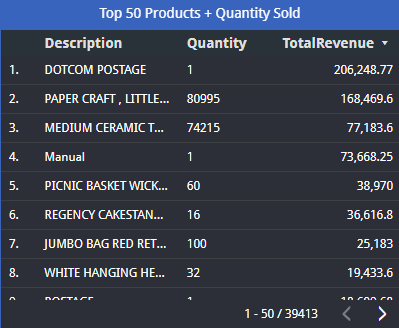

Our next element is the Sales Performance by Country. This pie chart is a great indicator of the different markets we cater to. The U.K is the biggest contributor by far, earning a whopping 84 percent.

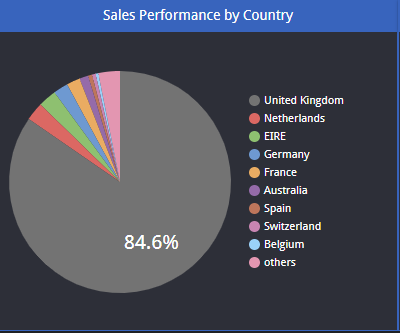

Next, we have the Highest Value Invoice Numbers. This element is for identifying the highest paying customers based on their Invoice Numbers (There was no Name or other identifying data in the dataset I got). This will show how much of the total revenue came from which individuals.

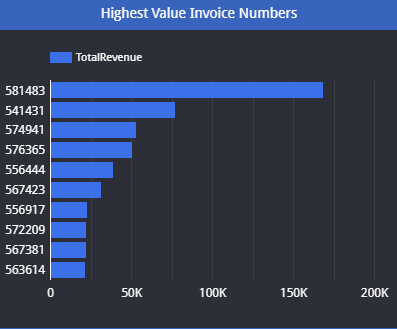

Finally, we have the Sales by Date element. This element shows the sales that were made on each day from December 1st 2010 to December 9th 2011. Great for seeing how sales change over time.

As we mentioned before, the 0 values are all on Saturday or on a Holiday, when I assume the business was closed. It is actually a great indicator which seperates the graph into week long chunks, making it easier to compare week to week.

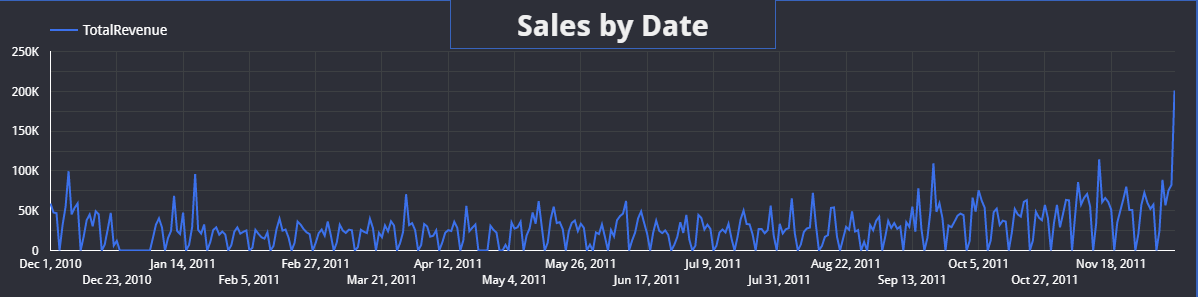

And here is the completed Dashboard! 

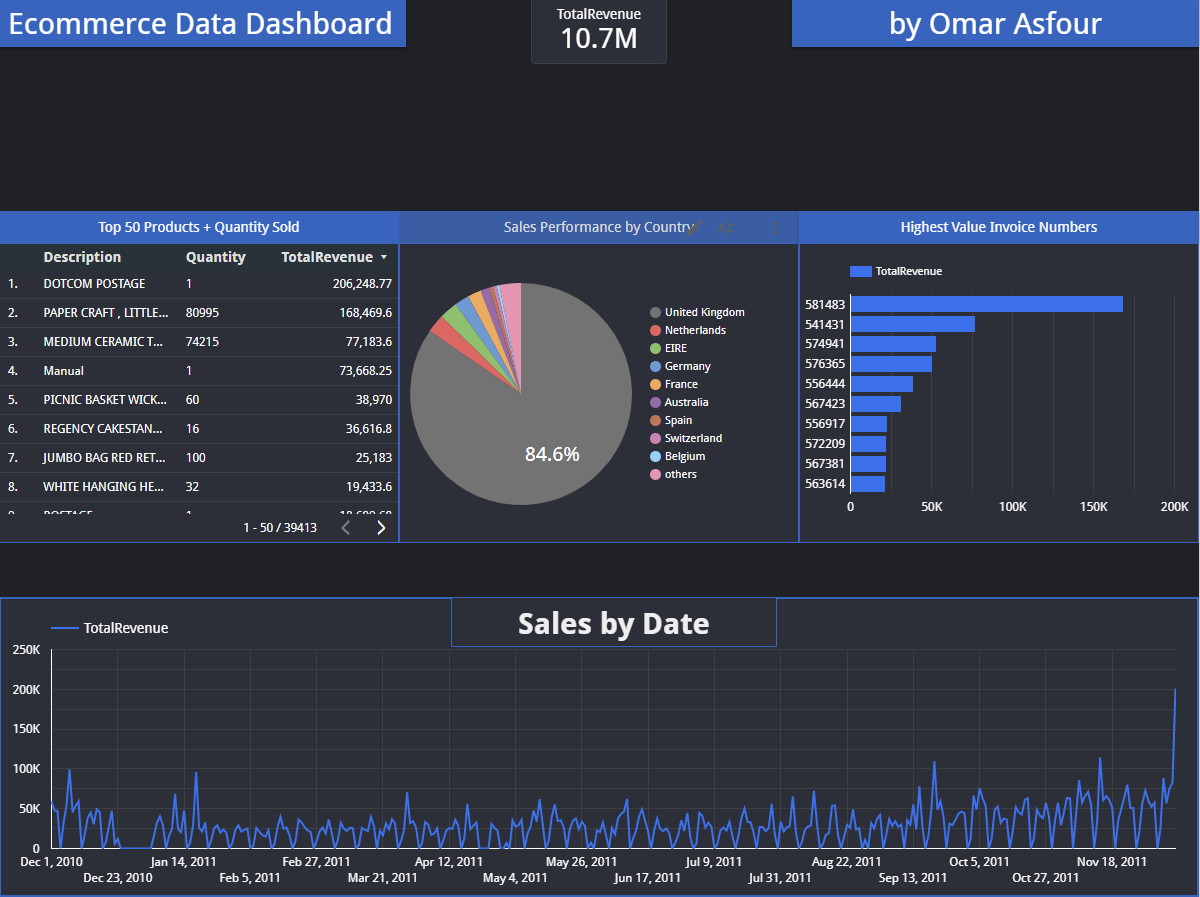

Thank you for taking the time to look through this quick project!

I have a passion for data analysis and finding solutions to data related issues, and I really enjoyed putting this dashboard together.

You can reach out to me via

email: asfour.omar9@gmail.com
linkedin: https://www.linkedin.com/in/omar-asfour/

And you can check out more of my projects on my Github! 